## Libraries

In [1]:
import os
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

In [2]:
cwd = os.getcwd()
df = pd.read_csv(cwd + "/cleaned_british-airways_reviews.csv", index_col=0)

In [3]:
df = df.reset_index(drop=True)

In [4]:
df.head()

reviews  ratings         country  \
0  ✅ Trip Verified | Excellent service both on th...        5  United Kingdom   
1  ✅ Trip Verified |  Good lounge at Cape Town. O...        9  United Kingdom   
2  ✅ Trip Verified |  A really excellent journey....        9  United Kingdom   
3  ✅ Trip Verified |  This flight was one of the ...        9  United Kingdom   
4  Not Verified | It seems that there is a race t...        2   United States   

         date  verified                                             corpus  
0  2023-01-24      True  excellent service ground board first class pro...  
1  2023-01-24      True  good lounge cape town time departure drink hig...  
2  2023-01-23      True  really excellent journey lounge overcrowded la...  
3  2023-01-21      True  flight one worst ever life wanted pamper bough...  
4  2023-01-19     False  verified seems race bottom amongst airline can...

## Exploratory Data Analysis

What is the average overall rating gave to British Airways?

In [5]:
df.ratings.mean()

4.449

What is the total number for each rating?

Text(0, 0.5, 'Number')

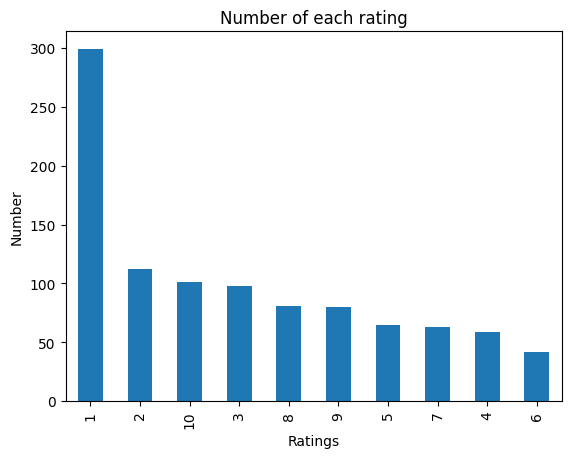

In [6]:
df.ratings.value_counts().plot(kind="bar")
plt.title("Number of each rating")
plt.xlabel("Ratings")
plt.ylabel("Number")

In [7]:
df_ratings = pd.DataFrame(df.ratings.value_counts())
per_values = (df_ratings.ratings.values/df_ratings.ratings.values.sum()* 100).tolist()
per_values = [round(x,2) for x in per_values]
df_ratings['per_values'] = per_values

In [8]:
df_ratings = df_ratings.reset_index()

In [9]:
df_ratings.rename(columns={'index':'ratings','ratings':'total_counts'}, inplace=True)

In [10]:
df_ratings

ratings  total_counts  per_values
0        1           299        29.9
1        2           112        11.2
2       10           101        10.1
3        3            98         9.8
4        8            81         8.1
5        9            80         8.0
6        5            65         6.5
7        7            63         6.3
8        4            59         5.9
9        6            42         4.2

Text(0, 0.5, 'Numbers')

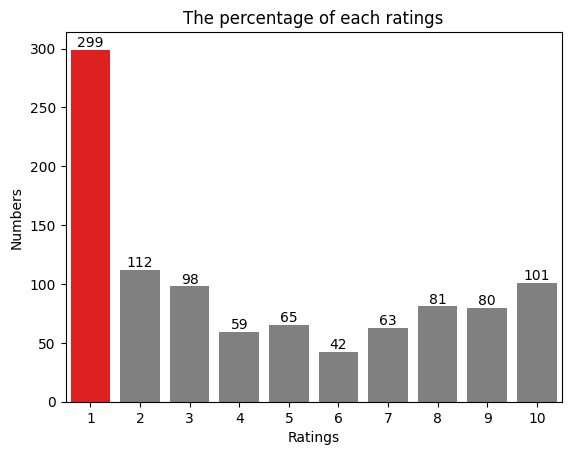

In [11]:
clrs = ['Red' if (x == max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.ratings,
                 y=df_ratings.total_counts,
                 data=df_ratings,
                 errwidth=0,
                 palette=clrs)

ax.bar_label(ax.containers[0])
ax.set_title("The percentage of each ratings")
ax.set_xlabel("Ratings")
ax.set_ylabel("Numbers")

In [12]:
print(f"{len(df.country.unique())} unique countries")

52 unique countries


Which countries did the most reviews come from?

In [13]:
df_reviewer_country = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [14]:
df_reviewer_country.rename(columns={'index':'country', 'country':'total_reviews'}, inplace=True)

Text(0.5, 1.0, 'Number of reviews by country')

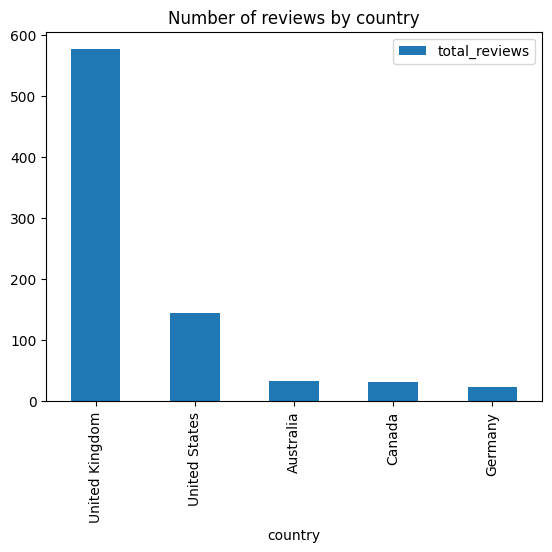

In [15]:
df_reviewer_country.plot(kind='bar', x='country')
plt.title('Number of reviews by country')

Which country gave the highest average rating?

In [16]:
df_rating_by_country = pd.DataFrame(df.groupby('country').mean()['ratings'].sort_values(ascending=False)).reset_index()

C:\Users\asisr\AppData\Local\Temp\ipykernel_30152\3934756861.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_rating_by_country = pd.DataFrame(df.groupby('country').mean()['ratings'].sort_values(ascending=False)).reset_index()


In [17]:
df_rating_by_country.rename(columns={'ratings':'avg_rating'}, inplace=True)

Text(0.5, 1.0, 'Top 10 countries with highest average rating')

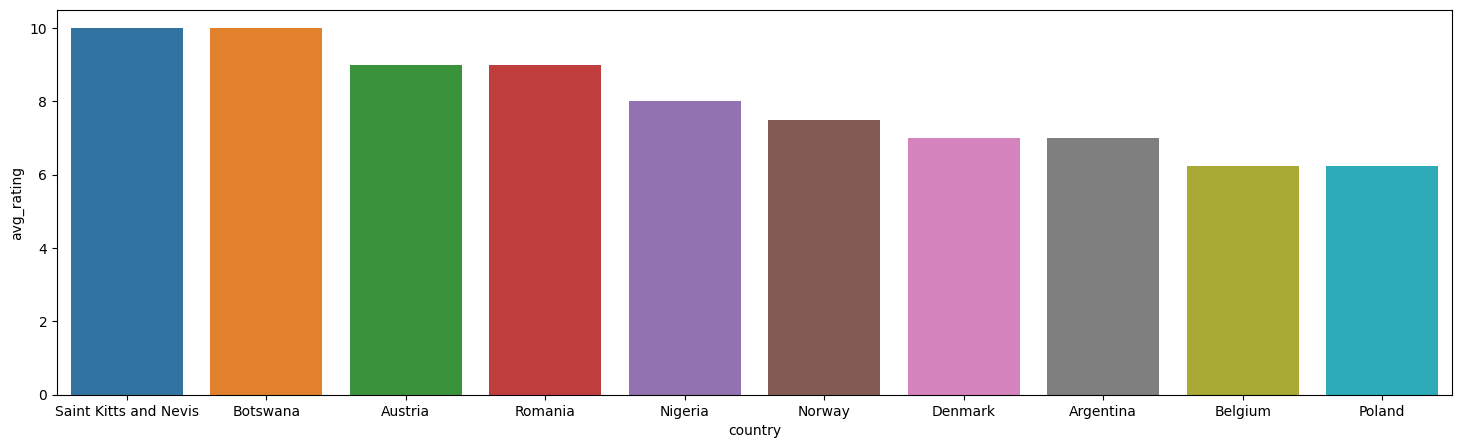

In [18]:
fig, ex = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_rating_by_country[:10])
ax.bar_label(ax.containers[0])
ax.set_title("Top 10 countries with highest average rating")

### Time Series Analysis

In [19]:
df.date = pd.to_datetime(df.date)

In [20]:
fig = px.line(df, x='date', y='ratings')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

It can be seen that between April 2020 to August 2021 there has been a decline in reviews due to Covid Pandemic travel restrictions. Not much can be inferred at this point as the dates we have are the when the customers posted their reviews which does not take into account the actual flight date. Hence no particular significan trend is visible from the plot.

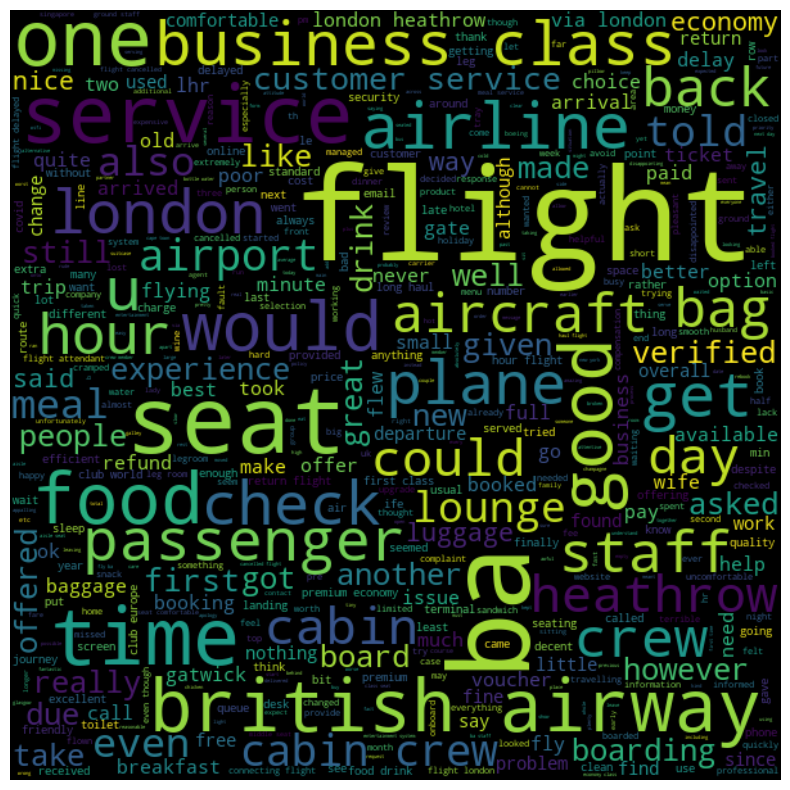

In [21]:
from nltk.corpus import stopwords

reviews = ' '.join(df.corpus)
plt.figure(figsize=(20, 10))

stopwords = set(stopwords.words('english'))

wordcloud = WordCloud(height=600, width=600, max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

There are many words that do not set the idea of ​​whether the review is positive or negative. For example words like "passenger", "flight", etc. does not add conclusive value hence we can include them in the stopwords list.

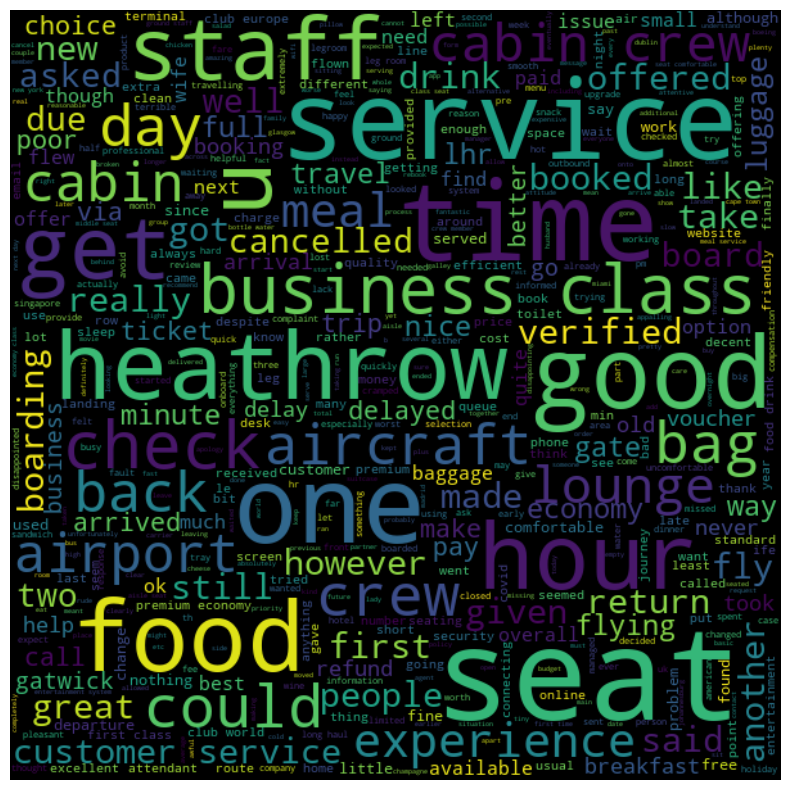

In [22]:
from nltk.corpus import stopwords

reviews = ' '.join(df.corpus)
plt.figure(figsize=(20, 10))

stopwords = set(stopwords.words('english'))
stopwords.update(['ba','flight','british','airway','airline','plane','told','also','passenger','london','heathrow'\
                 'aircraft','cloud','even','would'])

wordcloud = WordCloud(height=600, width=600, max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Word Frequency

In [23]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

words = reviews.split(' ')

stopwords = text.ENGLISH_STOP_WORDS.union(['flight','ba','passenger','u','london','airway','british','airline',\
                                          'heathrow','plane','lhr','review'])

new_words = [word for word in words if word not in stopwords]

nlp_words =  FreqDist(new_words).most_common(20)

all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'hour'),
  Text(5, 0, 'crew'),
  Text(6, 0, 'good'),
  Text(7, 0, 'class'),
  Text(8, 0, 'cabin'),
  Text(9, 0, 'staff'),
  Text(10, 0, 'business'),
  Text(11, 0, 'check'),
  Text(12, 0, 'customer'),
  Text(13, 0, 'day'),
  Text(14, 0, 'drink'),
  Text(15, 0, 'economy'),
  Text(16, 0, 'boarding'),
  Text(17, 0, 'meal'),
  Text(18, 0, 'bag'),
  Text(19, 0, 'experience')])

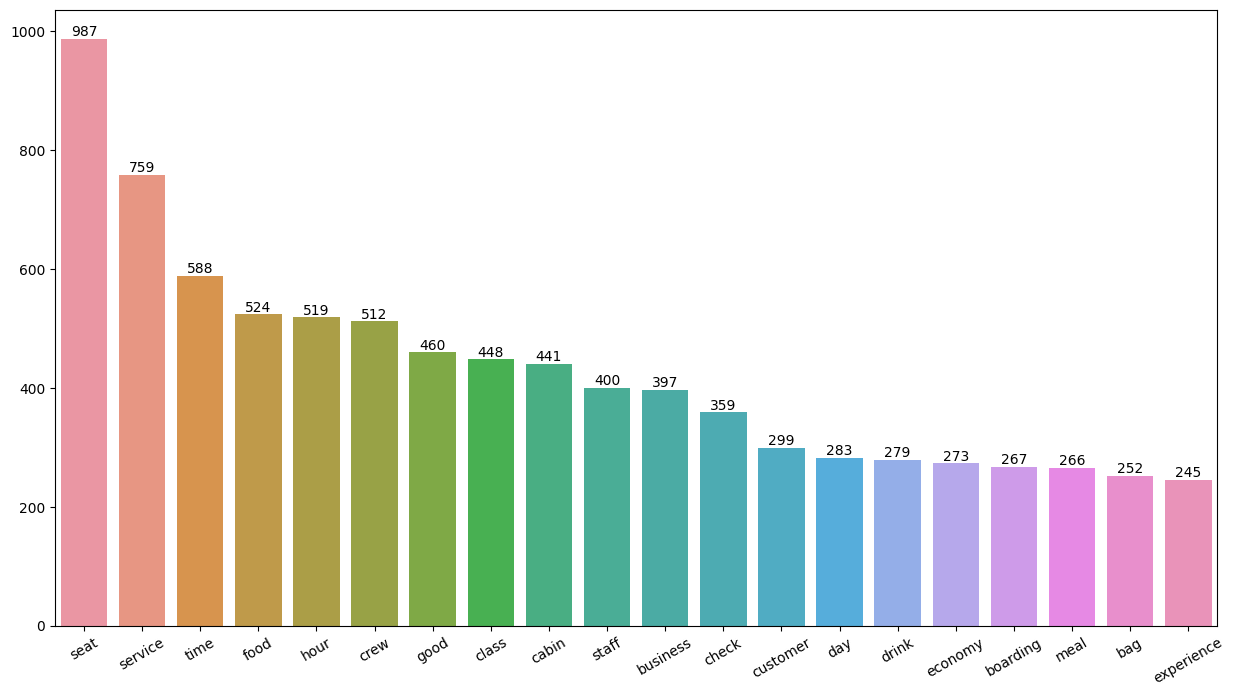

In [24]:
fig, ax = plt.subplots(figsize=(15,8))

all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

### Word Frequency with N-gram

<AxesSubplot: >

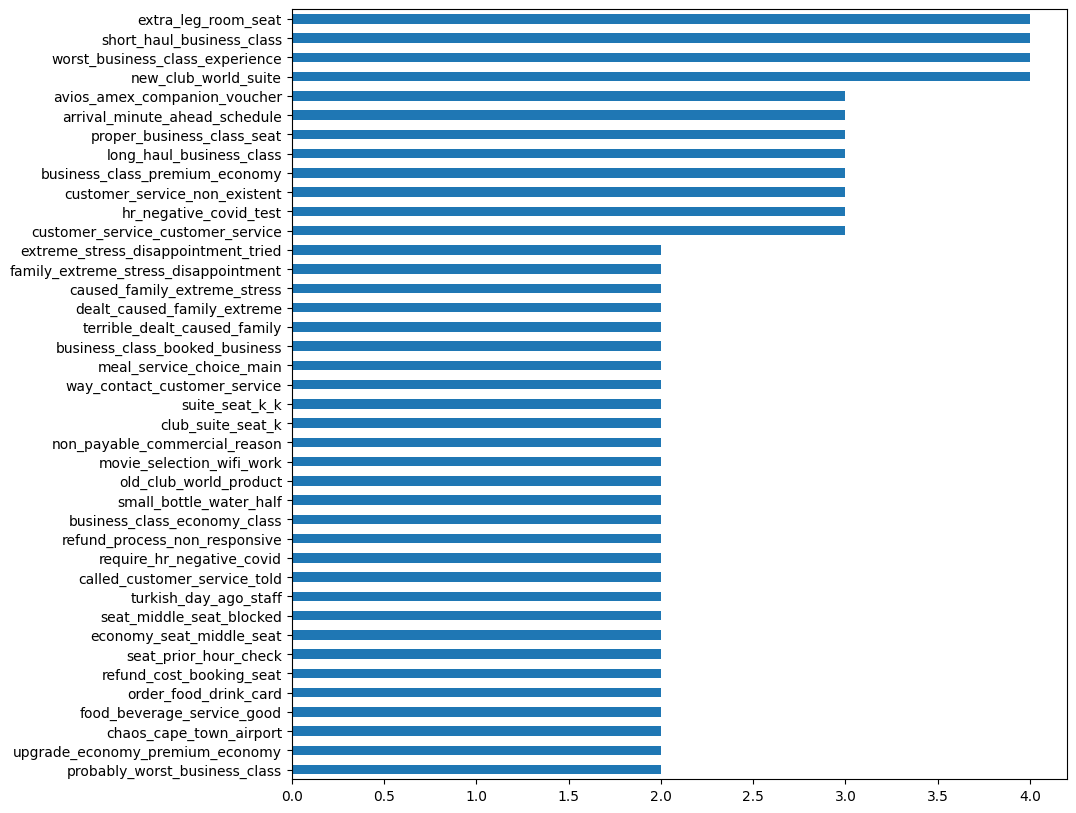

In [25]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = ' '.join(df.corpus)

# split the text of all reviews into alist of words
words = reviews.split(' ')

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words, number_of_ngrams):
    from nltk import ngrams
    
    # generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)
    
    # create FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)
    
    # sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}
    
    # join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}
    
    # convert to pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind='barh')
    
    return ax

get_freq_dist(new_words,4)

We can see that there are very common positive terms regarding cabin crew. For example, cabin_crew_friendly_helpful, cabin_crew_friendly_attentive, cabin_crew_friendly_efficient, etc. So certainly customers are providing good reviews about cabin crew staff of British Airways.

However, there is one another approach that we can try to find the word frequencies which will give us better idea. We will group the reviews based on ratings. Say, we assume ratigs 1-3 are bad reviews, 4-6 are average/good experience and 7-10 indicates a great experience.

In [26]:
ratings_1_3 = df[df.ratings.isin([1,2,3])]
ratings_4_6 = df[df.ratings.isin([4,5,6])]
ratings_7_10 = df[df.ratings.isin([7,8,9,10])]

<AxesSubplot: >

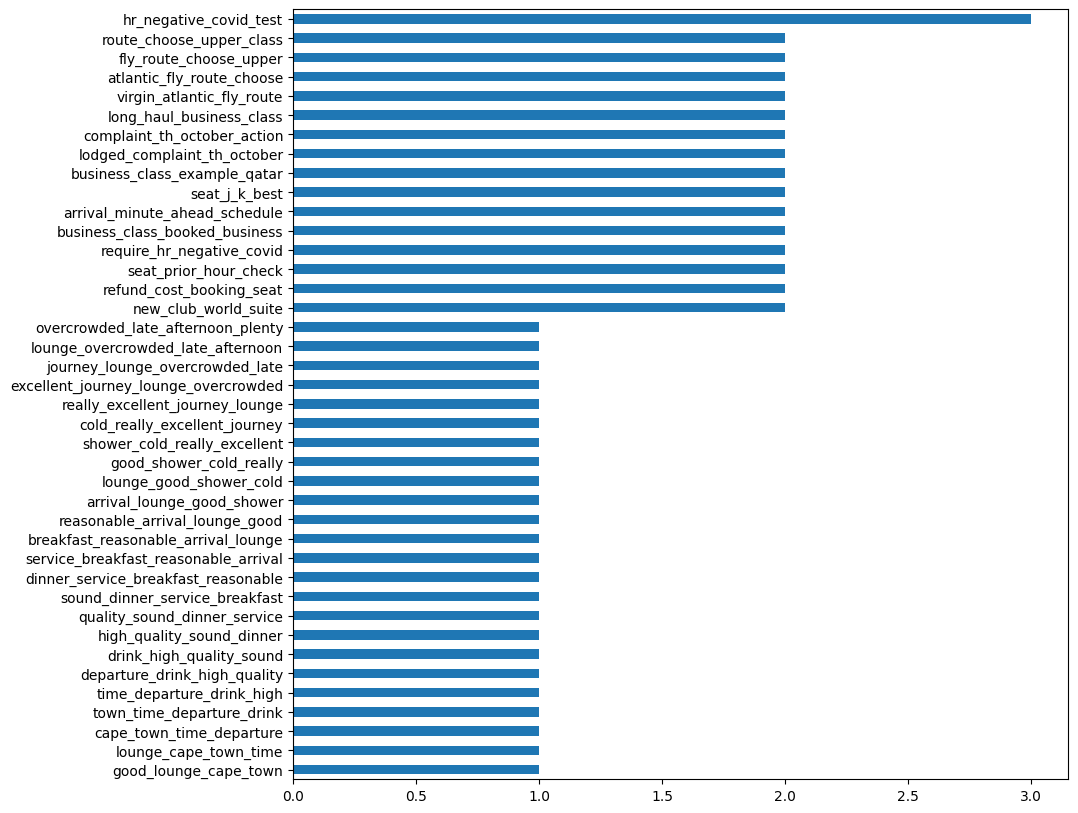

In [27]:
reviews_1_3 = ' '.join(ratings_1_3.corpus)
reviews_4_6 = ' '.join(ratings_4_6.corpus)
reviews_7_10 = ' '.join(ratings_7_10.corpus)

# split the text of all raviews into a list of words
words_1_3 = reviews_1_3.split(' ')
words_4_6 = reviews_4_6.split(' ')
words_7_10 = reviews_7_10.split(' ')

new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<AxesSubplot: >

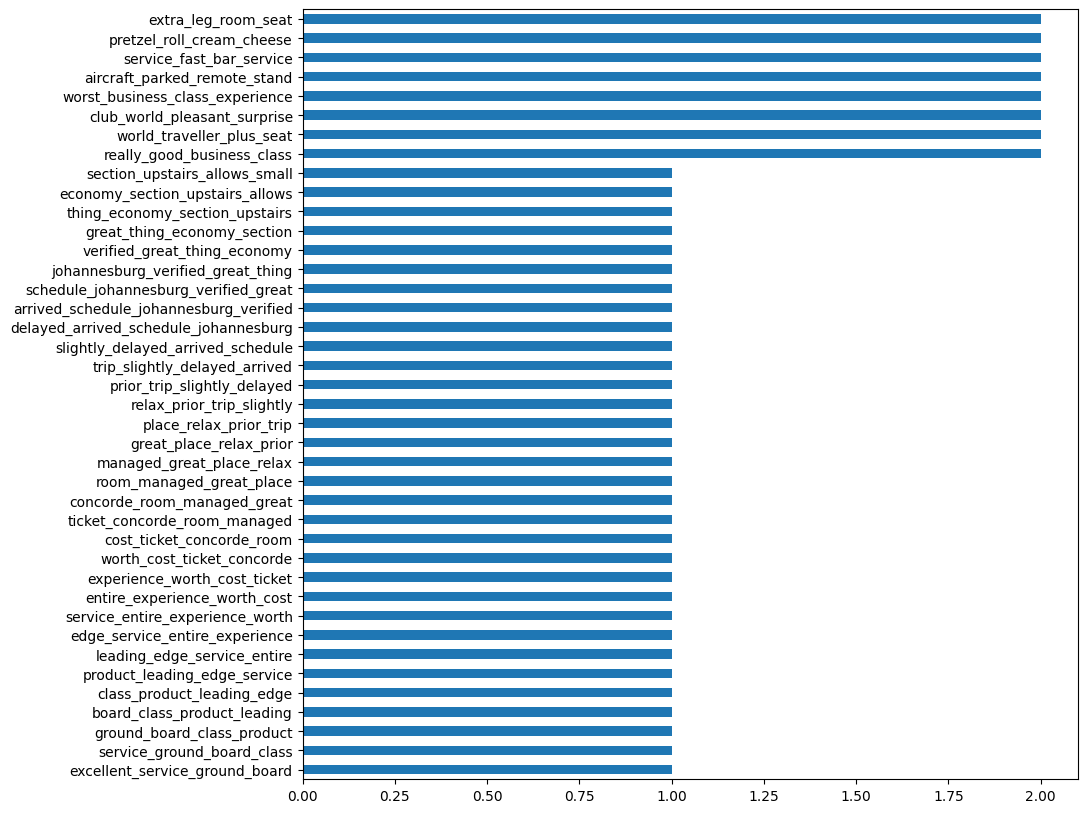

In [28]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words, 4)

<AxesSubplot: >

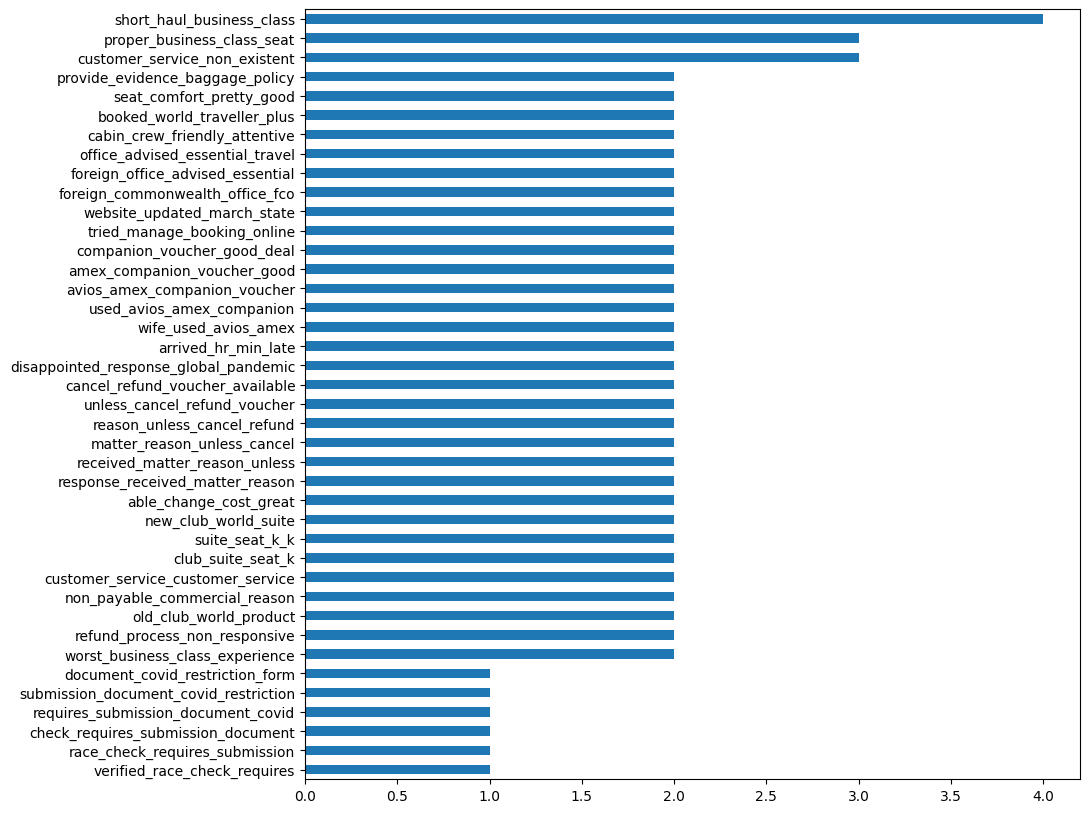

In [29]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

Now we will use textblob library to define if the text is negative or positive and to what extent

In [30]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

# set a column polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent = TextBlob(df.corpus[i])
    polarity = sent.sentiment.polarity
    subjectivity = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [31]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

631 number of reviews between -0.2 and 0.2 polarity score
374 number of reviews between -0.2 and 0.2 polarity score


Polarity score is given between -1 to 1 and more close the value to -1, it indicates negative review and vice versa is true for positive value. If we consider a threshold where any review with polarity greater than 0.2 is positive and less than -0.2 is negative, we are left with 2286 reviews that lies in the neutral zone. To further narrow down this number of neutral reviews, let's take the threshold of 0.1.

We will try another method of labelling the reveiws as positives or negatives. In this we will use VADER algorihtm by nltk library.

In [32]:
%%capture
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

# set a column Polarity with all 0 values initially
df['label'] = 0

for i in range(len(df.corpus)):
    score = vds.polarity_scores(df.corpus[i])['compound']
    # print(score)
    if score > 0.2:
        df['label'][i] = 1
        # print('1st')
    elif score < 0:
        df['label'][i] = -1
        # print('2nd')
    else:
        df['label'][i] = 0

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asisr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
df.label.value_counts()

 1    603
-1    357
 0     40
Name: label, dtype: int64

### Topic Modelling

We have already cleaned our reviews, however, for topic modeling we will also require word embeddings or (words matrix). For this purpose we will use count vectorizer method from sklearn library.

In [34]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

# create am object of count vectorizer
vect = CountVectorizer()

# apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names()

In [35]:
from sklearn.decomposition import LatentDirichletAllocation

# declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

# fit the term frequency data to the model
model.fit(tf)

# create empty dictionay to store key value pair of topic number and its weights
topic_dict = {}

# loop through model compopments
for topic_idx, topic in enumerate(model.components_):
    topic_dict['Topic %d words' % (topic_idx)] = ['{}'.format(tf_feature_names[i])
                                                  for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict['Topic %d weights' % (topic_idx)] = ['{:.1f}'.format(topic[i])
                                                  for i in topic.argsort()[:-10 - 1:-1]]
df_topic = pd.DataFrame(topic_dict)

In [36]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0        flight           268.5        flight           499.6        london   
1            ba           226.1          hour           192.6       service   
2          good           217.7            ba           144.5          food   
3       service           205.2           day           143.8        flight   
4          seat           176.2        london           129.7         staff   
5          club           151.5       airport           110.8            ba   
6        lounge           147.7        airway           102.7           bag   
7          time           146.0       british           101.8          seat   
8         cabin           140.2         staff            98.2         asked   
9          food           136.5          time            95.7          hour   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0            39.4        flight           254.5            ba           167.5   
1            39.0            ba           183.2        flight           115.5   
2            36.4       service           145.6          seat           109.7   
3            34.0          seat           141.7       airline            82.7   
4            32.8          crew           139.5      customer            74.1   
5            31.1          food           127.0         would            66.6   
6            30.5        london           123.2          call            65.2   
7            28.5          good           109.1           one            64.8   
8            27.0         class           106.3          told            61.0   
9            26.9         cabin           105.5           get            59.0   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights Topic 7 words  \
0        flight           138.8        flight           277.3        flight   
1          seat           123.9            ba           242.6          seat   
2          food            71.3       service           105.8            ba   
3          crew            71.0          seat           100.1        london   
4         class            69.7      customer            93.0      business   
5         cabin            68.7        refund            85.5          food   
6        london            66.1        booked            79.0         class   
7      business            58.1     cancelled            77.7          time   
8            ba            55.7          time            71.4       service   
9       airline            55.3       voucher            70.6       economy   

  Topic 7 weights  
0           454.8  
1           294.2  
2           165.1  
3           155.4  
4           141.2  
5           138.6  
6           137.5  
7           133.9  
8           126.1  
9           108.9

### Topic Modelling with NMF

In [37]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.03198518, 0.05384804],
       [0.03833948, 0.        ],
       [0.12833278, 0.        ],
       ...,
       [0.1742412 , 0.27669757],
       [0.14438331, 0.1365291 ],
       [0.00885438, 0.05049649]])

In [38]:
topic_dict = {}

# loop through model components
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict['Topic %d words' % (topic_idx)] = ['{}'.format(tf_feature_names[i])
                                                 for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict['Topic %d weights' % (topic_idx)] = ['{:.1f}'.format(topic[i])
                                                 for i in topic.argsort()[:-10 - 1:-1]]
df_topic = pd.DataFrame(topic_dict)

In [39]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights
0          seat            15.3        flight            15.6
1            ba             8.2            ba             6.0
2         class             6.6          hour             3.8
3      business             5.8        london             3.2
4          food             5.7          time             2.9
5         cabin             5.5       service             2.8
6       service             5.4           day             2.7
7          crew             5.1         would             2.5
8          good             5.0      customer             2.4
9       economy             4.7        airway             2.4


With NMF algorithm as well we see there are few words that are not conclusive like "seat". So we will remove such words from the list and try topic modeling again.